# Parallelization Analysis

## MPI (using OpenMPI)

### Methods
Ran `shk_cloud` problem with default Riemann solver and settings with and without MPI enabled (OpenMPI and command `mpiexec` was used). Three (3) runs with 0 (control), 2, 4, and 8 "meshblocks" (domain decomposition) for two input datasets: default and double mesh resolution.

### Results

In [1]:
import numpy as np

res1_mb1 = np.array([3.9218750000000000e+00, 3.6562500000000000e+00, 3.9375000000000000e+00])
res1_mb2 = np.array([2.2500000000000000e+00, 2.1875000000000000e+00, 2.2968750000000000e+00])
res1_mb4 = np.array([1.7656250000000000e+00, 1.8281250000000000e+00, 1.7812500000000000e+00])
res1_mb8 = np.array([1.3437500000000000e+00, 1.6250000000000000e+00, 1.6093750000000000e+00])
res2_mb1 = np.array([3.1000000000000000e+01, 3.0562500000000000e+01, 2.9984375000000000e+01])
res2_mb2 = np.array([1.8187500000000000e+01, 1.7781250000000000e+01, 1.9453125000000000e+01])
res2_mb4 = np.array([1.4937500000000000e+01, 1.5703125000000000e+01, 1.5968750000000000e+01])
res2_mb8 = np.array([1.1703125000000000e+01, 1.1593750000000000e+01, 1.1765625000000000e+01])

r1mb1_mean = np.mean(res1_mb1)
r1mb2_mean = np.mean(res1_mb2)
r1mb4_mean = np.mean(res1_mb4)
r1mb8_mean = np.mean(res1_mb8)
r2mb1_mean = np.mean(res2_mb1)
r2mb2_mean = np.mean(res2_mb2)
r2mb4_mean = np.mean(res2_mb4)
r2mb8_mean = np.mean(res2_mb8)

r1mb1_std = np.std(res1_mb1)
r1mb2_std = np.std(res1_mb2)
r1mb4_std = np.std(res1_mb4)
r1mb8_std = np.std(res1_mb8)
r2mb1_std = np.std(res2_mb1)
r2mb2_std = np.std(res2_mb2)
r2mb4_std = np.std(res2_mb4)
r2mb8_std = np.std(res2_mb8)

### Analysis

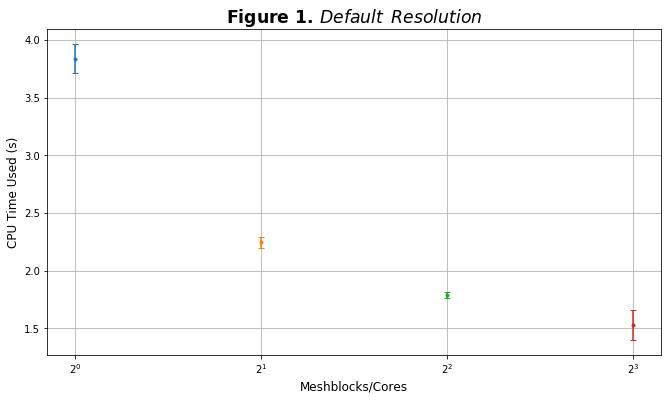

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=[11, 6])
plt.title('Figure 1. $Default \hspace{.5} Resolution$', fontsize='xx-large', fontweight='bold')
plt.xlabel('Meshblocks/Cores', fontsize='large')
plt.xscale('log', basex=2)
plt.ylabel('CPU Time Used (s)', fontsize='large')
# plt.yscale('log', basey=2)
plt.errorbar(1, r1mb1_mean, r1mb1_std, marker='.', capsize=3)
plt.errorbar(2, r1mb2_mean, r1mb2_std, marker='.', capsize=3)
plt.errorbar(4, r1mb4_mean, r1mb4_std, marker='.', capsize=3)
plt.errorbar(8, r1mb8_mean, r1mb8_std, marker='.', capsize=3)
plt.grid()
plt.show()

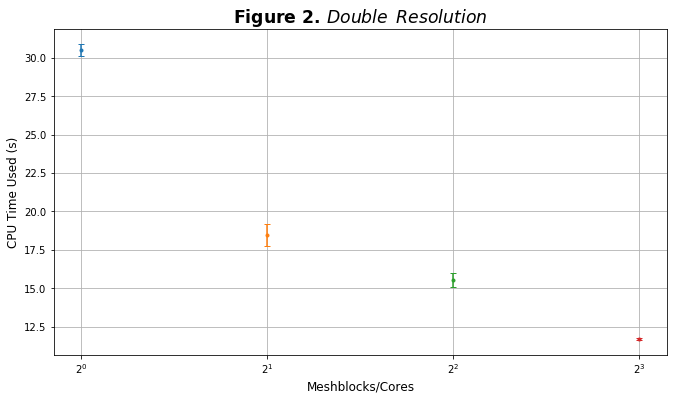

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=[11, 6])
plt.title('Figure 2. $Double \hspace{.5} Resolution$', fontsize='xx-large', fontweight='bold')
plt.xlabel('Meshblocks/Cores', fontsize='large')
plt.xscale('log', basex=2)
plt.ylabel('CPU Time Used (s)', fontsize='large')
# plt.yscale('log', basey=2)
plt.errorbar(1, r2mb1_mean, r2mb1_std, marker='.', capsize=3)
plt.errorbar(2, r2mb2_mean, r2mb2_std, marker='.', capsize=3)
plt.errorbar(4, r2mb4_mean, r2mb4_std, marker='.', capsize=3)
plt.errorbar(8, r2mb8_mean, r2mb8_std, marker='.', capsize=3)
plt.grid()
plt.show()